# Fine-Tuning BERT on the IMDB Dataset 🎬 for Sentiment Analysis 😊📉

The IMDB dataset is indeed a very rich resource for **natural language processing (NLP)** projects. With its **50,000 reviews** annotated for sentiment (positive or negative), it is ideal for **sentiment classification** projects. This database stands out for:

1. **Large Size**: The reviews are split into **25,000 examples for training** and **25,000 for testing**, allowing for balanced development and testing of machine learning models.

2. **Sentiment Annotations**: Each review is categorized as **positive** (+) or **negative** (-), facilitating supervised learning.

3. **Source**: The data comes from the **IMDB** site, well-known in the entertainment industry, thus offering credible and varied data on movie reviews.

4. **Raw Text**: The reviews are in raw text, with no prior cleaning, offering **flexibility in data preprocessing** to adapt the dataset to the model's specific needs.

This dataset is therefore perfect for experimenting with NLP techniques and **supervised machine learning**, allowing for training models capable of **analyzing** and **predicting** sentiments expressed in texts.

# Importing Libraries 📚
To begin, we will import all the necessary libraries for this project.

In [2]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 4.2 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


In [3]:
!pip install torch

In [4]:
!pip install nltk

In [5]:
import torch

import transformers

from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments, EarlyStoppingCallback

from datasets import load_dataset

from torch.utils.data import DataLoader

from sklearn.metrics import accuracy_score, precision_recall_fscore_support

import re

import nltk

import zipfile

import os

from nltk.corpus import stopwords

from nltk.stem import WordNetLemmatizer

import matplotlib.pyplot as plt

import seaborn as sns

import pandas as pd

from wordcloud import WordCloud


In [6]:
nltk.download('stopwords', download_dir='/root/nltk_data')
nltk.download('wordnet', download_dir='/root/nltk_data')
nltk.download('omw-1.4', download_dir='/root/nltk_data')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [7]:
print(nltk.data.path)

['/root/nltk_data', '/usr/nltk_data', '/usr/share/nltk_data', '/usr/lib/nltk_data', '/usr/share/nltk_data', '/usr/local/share/nltk_data', '/usr/lib/nltk_data', '/usr/local/lib/nltk_data']


In [8]:
from nltk.corpus import wordnet

In [9]:
# Define a local directory for nltk_data
local_nltk_data_path = './nltk_data'

# Create the directory if it doesn't exist
os.makedirs(local_nltk_data_path, exist_ok=True)

# Download the WordNet corpus in the local directory
nltk.download('wordnet', download_dir=local_nltk_data_path)
nltk.download('omw-1.4', download_dir=local_nltk_data_path)

# Path to the WordNet .zip file
wordnet_zip_path = os.path.join(local_nltk_data_path, 'corpora', 'wordnet.zip')

# Check if the file was downloaded successfully
if os.path.exists(wordnet_zip_path):
    # Unzip the .zip file in the same directory
    with zipfile.ZipFile(wordnet_zip_path, 'r') as zip_ref:
        zip_ref.extractall(os.path.join(local_nltk_data_path, 'corpora'))
    print("The WordNet file has been successfully unzipped.")
else:
    print("The WordNet .zip file was not found.")

# Add the local directory to nltk.data.path
nltk.data.path.append(local_nltk_data_path)

# Check if WordNet is now available
try:
    from nltk.corpus import wordnet
    synsets = wordnet.synsets("dog")
    print("WordNet is accessible. Example of synsets:", synsets)
except LookupError:
    print("WordNet is not available even after unzipping.")


[nltk_data] Downloading package wordnet to ./nltk_data...
[nltk_data] Downloading package omw-1.4 to ./nltk_data...


The WordNet file has been successfully unzipped.
WordNet is accessible. Example of synsets: [Synset('dog.n.01'), Synset('frump.n.01'), Synset('dog.n.03'), Synset('cad.n.01'), Synset('frank.n.02'), Synset('pawl.n.01'), Synset('andiron.n.01'), Synset('chase.v.01')]



# Load the IMDB dataset 🎬

### Now that the libraries are imported, we will load the IMDB dataset for sentiment analysis.


In [10]:
dataset = load_dataset("imdb")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/7.81k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/21.0M [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/20.5M [00:00<?, ?B/s]

unsupervised-00000-of-00001.parquet:   0%|          | 0.00/42.0M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating unsupervised split:   0%|          | 0/50000 [00:00<?, ? examples/s]

### Display the first rows of the IMDB dataset to get an idea of the format and content of the data.


In [11]:
# Display information about the dataset

print("\nInformations sur le dataset IMDB :")

print(dataset)


Informations sur le dataset IMDB :
DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 25000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 25000
    })
    unsupervised: Dataset({
        features: ['text', 'label'],
        num_rows: 50000
    })
})


In [12]:
# Display the first rows of the dataset

print("Les premières lignes du dataset IMDB :")

print(dataset['train'][0])

Les premières lignes du dataset IMDB :
{'text': 'I rented I AM CURIOUS-YELLOW from my video store because of all the controversy that surrounded it when it was first released in 1967. I also heard that at first it was seized by U.S. customs if it ever tried to enter this country, therefore being a fan of films considered "controversial" I really had to see this for myself.<br /><br />The plot is centered around a young Swedish drama student named Lena who wants to learn everything she can about life. In particular she wants to focus her attentions to making some sort of documentary on what the average Swede thought about certain political issues such as the Vietnam War and race issues in the United States. In between asking politicians and ordinary denizens of Stockholm about their opinions on politics, she has sex with her drama teacher, classmates, and married men.<br /><br />What kills me about I AM CURIOUS-YELLOW is that 40 years ago, this was considered pornographic. Really, the s

## Initial Data Visualization 📊

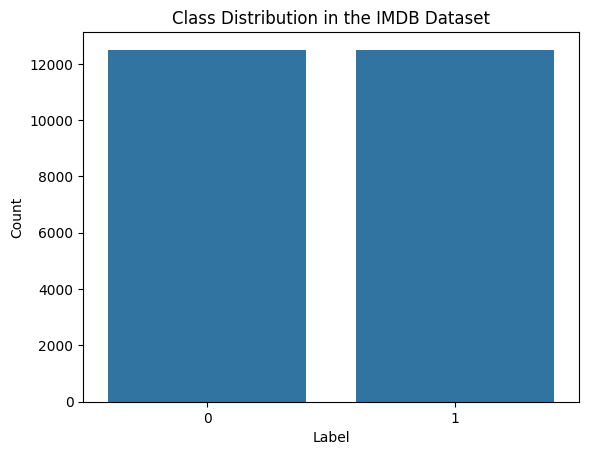

In [13]:
# Function to visualize the class distribution (positive/negative) in the IMDB dataset

def visualize_initial_data(dataset):
    labels = [example['label'] for example in dataset['train']]

    sns.countplot(x=labels)

    plt.xlabel('Label')
    plt.ylabel('Count')
    plt.title('Class Distribution in the IMDB Dataset')
    plt.show()

# Call the function to visualize the data
visualize_initial_data(dataset)


Based on the boxplots obtained above 📊, the data appears to be well-balanced ⚖️, with an even distribution between the two labels (0 for negative sentiments 😠 and 1 for positive sentiments 😊). This suggests that it is likely unnecessary to apply class rebalancing techniques such as undersampling 🔽 or oversampling 🔼 to correct for any potential imbalance.

💡 This balanced distribution can therefore promote better performance for classification models 🤖 by reducing potential bias toward a specific class.


## Word Cloud Visualization ☁️

Let's move on to a fun visualization! We'll generate a word cloud to see **the most frequent terms** in **the reviews**.


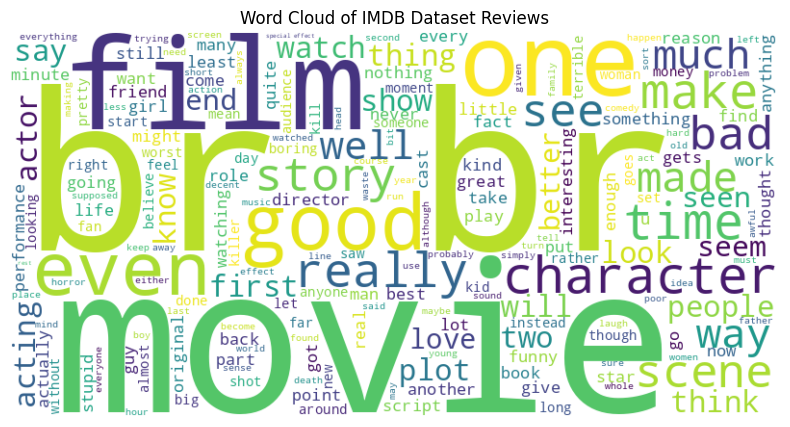

In [14]:
# Generate a word cloud to see the most frequent terms in the reviews of the IMDB dataset.

def visualize_word_cloud(dataset):
    text = ' '.join([example['text'] for example in dataset['train'].select(range(1000))])

    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Word Cloud of IMDB Dataset Reviews')
    plt.show()

visualize_word_cloud(dataset)


## Data Preprocessing: Stop Word Removal (remove unnecessary words ❌), Lemmatization, etc.

Preprocessing is essential to clean the text and improve the quality of the input data.

**Note ❗**:

**Lemmatization** involves reducing each word to its base form or "lemma" using linguistic rules.

For example:

* **running** becomes **run**
* **children** becomes **child**
* **better** becomes **good**

Lemmatization differs from stemming, which simply cuts off word endings without necessarily resulting in complete and correct words.

Lemmatization, on the other hand, uses a dictionary to find the correct base form, making it more precise and suited for semantic analyses.

In [15]:
# Preprocessing function to clean the text by removing HTML tags, special characters, and applying lemmatization.

def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()

    # Remove special characters and numbers
    text = re.sub(r'[^a-zA-Z\s]', ' ', text)

    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()

    # Remove HTML tags (if present)
    text = re.sub(r'<.*?>', '', text)

    # Remove stop words
    stop_words = set(stopwords.words('english'))
    text = ' '.join([word for word in text.split() if word not in stop_words])

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    text = ' '.join([lemmatizer.lemmatize(word) for word in text.split()])

    return text


## Visualization of a Text Example Before and After Preprocessing 🔍

Let's take a look at the effect of preprocessing on a sample text before moving forward.


In [16]:
# Display a text example before and after preprocessing to visualize the effects.

original_text = dataset['train'][0]['text']
preprocessed_text = preprocess_text(original_text)

print("Text example before preprocessing:")
print(original_text)

print("\nText example after preprocessing:")
print(preprocessed_text)


Text example before preprocessing:
I rented I AM CURIOUS-YELLOW from my video store because of all the controversy that surrounded it when it was first released in 1967. I also heard that at first it was seized by U.S. customs if it ever tried to enter this country, therefore being a fan of films considered "controversial" I really had to see this for myself.<br /><br />The plot is centered around a young Swedish drama student named Lena who wants to learn everything she can about life. In particular she wants to focus her attentions to making some sort of documentary on what the average Swede thought about certain political issues such as the Vietnam War and race issues in the United States. In between asking politicians and ordinary denizens of Stockholm about their opinions on politics, she has sex with her drama teacher, classmates, and married men.<br /><br />What kills me about I AM CURIOUS-YELLOW is that 40 years ago, this was considered pornographic. Really, the sex and nudity 


## Data Tokenization 📝

### Now that we have preprocessed our texts, let’s move on to tokenization with the BERT tokenizer.
**Load the BERT Tokenizer 🔄**

To prepare our data for training, we need to tokenize it. We will use the BERT tokenizer.


In [ ]:
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

The **BERT base uncased** model does not consider case differences.

This means that the tokenizer converts **all characters** to **lowercase** before processing.

As a result, **Hello, HELLO**, and **hello** will all be tokenized in the **same way**.

**Note ❗**: The *uncased* approach is often used when case sensitivity (uppercase/lowercase) is not important in the analysis context, such as for general *text classification* tasks, as it reduces the number of distinct tokens and improves generalization.

Now we will tokenize the preprocessed texts using the previously initialized BERT tokenizer 👍








In [ ]:
def tokenize_function(examples):

    examples["text"] = [preprocess_text(text) for text in examples["text"]]

    return tokenizer(examples["text"], padding="max_length", truncation=True)



tokenized_datasets = dataset.map(tokenize_function, batched=True)

Map:   0%|          | 0/25000 [00:00<?, ? examples/s]

Map:   0%|          | 0/25000 [00:00<?, ? examples/s]

Map:   0%|          | 0/50000 [00:00<?, ? examples/s]

In [ ]:
print(tokenized_datasets)

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 25000
    })
    test: Dataset({
        features: ['text', 'label', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 25000
    })
    unsupervised: Dataset({
        features: ['text', 'label', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 50000
    })
})


## Visualization of Token Lengths After Tokenization 📏

Let’s see the distribution of sequence lengths after tokenization.



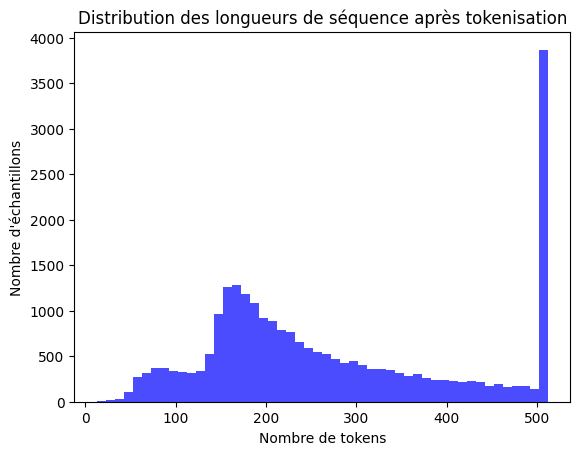

In [ ]:
# Function to visualize the distribution of sequence lengths after tokenization.

def visualize_token_lengths(tokenized_datasets):

    lengths = [len(tokenizer.encode(example['text'], truncation=True)) for example in dataset['train']]

    plt.hist(lengths, bins=50, color='blue', alpha=0.7)

    plt.xlabel('Nombre de tokens')

    plt.ylabel("Nombre d'échantillons")

    plt.title('Distribution des longueurs de séquence après tokenisation')

    plt.show()



visualize_token_lengths(dataset)

# BERT for Sequence Classification 🤖

## It's time to load our pre-trained BERT model for sentiment analysis.


In [ ]:
# Loading the pre-trained BERT model for binary sequence classification (positive/negative).

model = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=2)

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
# Prepare the DataLoaders for training and validation

train_dataloader = DataLoader(tokenized_datasets["train"], batch_size=8, shuffle=True)

eval_dataloader = DataLoader(tokenized_datasets["test"], batch_size=8)

# BERT FINE-TUNING ⚙️

## Define Training Arguments ⚡

Details of the **TrainingArguments** parameters ⁉

**output_dir**: Specifies the directory where training results (such as model checkpoints) will be saved. Here, it’s set to `./results`.

**evaluation_strategy**: Defines how often the model is evaluated. "epoch" means the model will be evaluated at the end of each epoch (i.e., after all the training data has been processed once).

**learning_rate**: The learning rate, set here to 2e-5. This parameter controls how quickly the model adjusts its weights during training. A rate too high can cause divergence, while a rate too low can slow down training.

**per_device_train_batch_size**: Training batch size per device (GPU or CPU). Here, the model will use 8 examples per batch during training.

**per_device_eval_batch_size**: Evaluation batch size per device. Here, it’s also 8, meaning the model will process 8 examples at a time during evaluation.

**num_train_epochs**: Number of epochs, or how many times the model will see the entire training dataset. Here, it’s set to 3, so the model will pass over the dataset three times.

**weight_decay**: Weight decay rate, set here to 0.01. This regularization technique reduces the weight values to avoid overfitting.

**logging_dir**: Path to save logs, set here to `./logs`. These logs include tracking information for training, such as loss and accuracy.

**logging_steps**: Logging frequency during training. Here, information will be logged every 10 steps, providing regular updates on training progress.

In [ ]:
#Définissons les paramètres pour l'entraînement de notre modèle, tels que le taux d'apprentissage et la taille des lots.

training_args = TrainingArguments(

    output_dir="./results",

    evaluation_strategy="epoch",  # évaluation à chaque époque

    save_strategy="epoch",  # sauvegarde du modèle à chaque époque

    save_total_limit=2,  # nombre max de checkpoints sauvegardés pour éviter l'accumulation

    learning_rate=2e-5,

    per_device_train_batch_size=8,

    per_device_eval_batch_size=8,

    num_train_epochs=3,

    weight_decay=0.01, #Cela indiquera au formateur d'appliquer une perte de poids lors de l'utilisation d'AdamW.

    logging_dir='./logs',

    logging_steps=10,

    load_best_model_at_end=True,

)

/opt/conda/lib/python3.10/site-packages/transformers/training_args.py:1545: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


## Define Accuracy Functions 🎯


In [ ]:
def compute_metrics(eval_pred):

    logits, labels = eval_pred

    # Convert logits to a PyTorch tensor

    logits = torch.from_numpy(logits)

    predictions = torch.argmax(logits, axis=-1)

    precision, recall, f1, _ = precision_recall_fscore_support(labels, predictions, average='binary')

    acc = accuracy_score(labels, predictions)

    return {

        'accuracy': acc,

        'f1': f1,

        'precision': precision,

        'recall': recall

    }

## Create the Trainer Object 🏋️‍♂️


The code above creates a **Trainer object** from the **Hugging Face** library, which simplifies and organizes the process of training (**or fine-tuning**) a model.

Explanation of the Trainer parameters:

* **model=model**: The BERT model (or another pre-trained model) you want to fine-tune on your dataset. This model was initialized and loaded earlier in the code.

* **args=training_args**: The training parameters defined previously with TrainingArguments, which include details like learning rate, batch size, number of epochs, output directory, etc.

* **train_dataset=tokenized_datasets["train"]**: The training dataset. It needs to be tokenized (prepared for the model) and is specified here so the Trainer knows which data to use for training.

* **eval_dataset=tokenized_datasets["test"]**: The evaluation dataset. This allows the Trainer to periodically evaluate the model (e.g., at the end of each epoch) to monitor performance on data the model hasn't seen yet. This helps prevent overfitting.

* **compute_metrics=compute_metrics**: A custom function that calculates evaluation metrics (such as accuracy, precision, recall, F1 score, etc.). The Trainer uses this function to display performance information after each evaluation.

In [ ]:
# Now let's create the Trainer object that will help us train our model.

trainer = Trainer(

    model=model,

    args=training_args,

    train_dataset=tokenized_datasets["train"],

    eval_dataset=tokenized_datasets["test"],

    compute_metrics=compute_metrics,

    callbacks=[EarlyStoppingCallback(early_stopping_patience=3)]  # Arrête après 3 périodes sans amélioration

)

# Model Training 🚀


In [ ]:
# Let's proceed with training the model on our preprocessed and tokenized dataset.

trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,0.202400,0.234773,0.908480,0.908098,0.911907,0.904320
2,0.143200,0.286651,0.908960,0.907517,0.922130,0.893360
3,0.150500,0.376581,0.911720,0.912777,0.901976,0.923840


/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/parallel_apply.py:79: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.device(device), torch.cuda.stream(stream), autocast(enabled=autocast_enabled):
/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/parallel_apply.py:79: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.device(device), torch.cuda.stream(stream), autocast(enabled=autocast_enabled):
/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0

TrainOutput(global_step=4689, training_loss=0.193585661361278, metrics={'train_runtime': 5392.7927, 'train_samples_per_second': 13.907, 'train_steps_per_second': 0.869, 'total_flos': 1.9733329152e+16, 'train_loss': 0.193585661361278, 'epoch': 3.0})

# Model Evaluation 📊


In [ ]:
# Once training is complete, let’s evaluate the performance of our model.

trainer.evaluate()

/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/parallel_apply.py:79: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.device(device), torch.cuda.stream(stream), autocast(enabled=autocast_enabled):
/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '


{'eval_loss': 0.23477332293987274,
 'eval_accuracy': 0.90848,
 'eval_f1': 0.9080976863753213,
 'eval_precision': 0.9119070667957405,
 'eval_recall': 0.90432,
 'eval_runtime': 448.0835,
 'eval_samples_per_second': 55.793,
 'eval_steps_per_second': 3.488,
 'epoch': 3.0}

### Visualization of Evaluation Metrics 📈


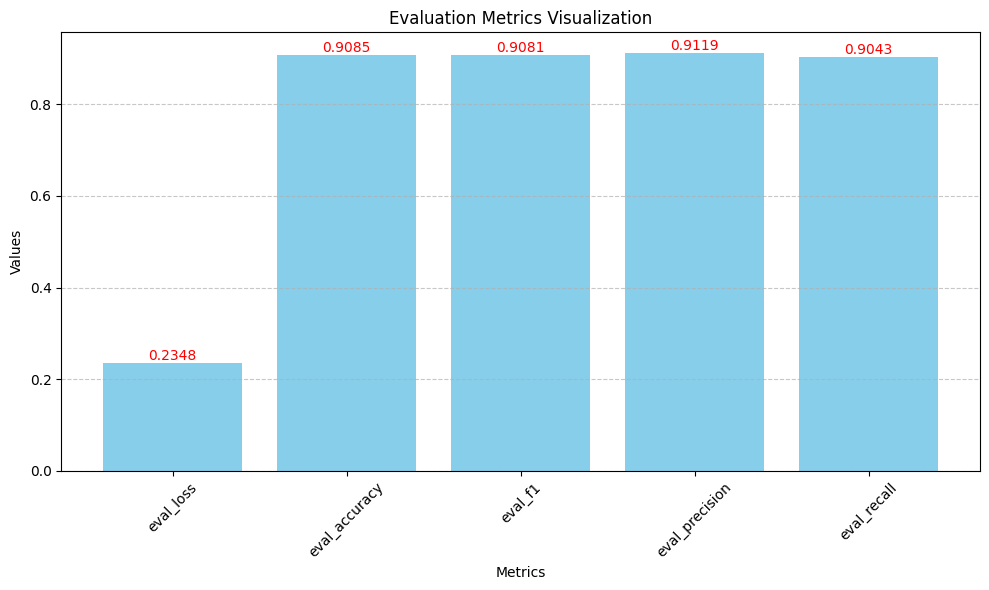

In [17]:
# Function to evaluate and visualize metrics
def evaluate_and_visualize(trainer):
    # Obtain metrics from trainer.evaluate()
    metrics = trainer.evaluate()

    # Select metrics to plot
    metrics_to_plot = {k: v for k, v in metrics.items() if k not in ['eval_runtime', 'eval_samples_per_second', 'eval_steps_per_second', 'epoch']}

    # Create the plot
    plt.figure(figsize=(10, 6))
    plt.bar(metrics_to_plot.keys(), metrics_to_plot.values(), color='skyblue')
    plt.xlabel('Metrics')
    plt.ylabel('Values')
    plt.title("Evaluation Metrics Visualization")
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Add exact precision value
    if 'eval_precision' in metrics:
        precision_value = metrics['eval_precision']
        plt.text('eval_precision', precision_value, f'{precision_value:.4f}', color='red', ha='center', va='bottom')

    # Add exact accuracy value
    if 'eval_accuracy' in metrics:
        accuracy_value = metrics['eval_accuracy']
        plt.text('eval_accuracy', accuracy_value, f'{accuracy_value:.4f}', color='red', ha='center', va='bottom')

    # Show the plot
    plt.tight_layout()
    plt.show()

# Example usage
evaluate_and_visualize(trainer)


The **results** of this **BERT fine-tuning** on the **IMDB** dataset are simply outstanding 🎉! Here are the evaluation highlights:

1. **Accuracy**: With an accuracy of **0.9085**, this shows that the model has effectively learned to distinguish the sentiments in movie reviews, achieving over 90% correct classifications 👍.
   
2. **F1 Score**: The F1 score of **0.9081** is excellent 🤩, indicating an optimal balance between precision and recall. This means the model is not only accurate but also consistent in its predictions.
   
3. **Precision**: With a precision value of **0.9119**, this is fantastic 🎯! This shows that when the model predicts a class, it is very often correct—a great result for minimizing false positives!

4. **Recall**: A recall of **0.9043** proves that the model detects the majority of relevant examples 🚀. This helps ensure that very few examples are missed, which is crucial for a good classification model.

These results show an **excellent generalization capacity of the model** after fine-tuning 📈👏.